In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Plot time-series data

In [65]:
import scipy

In [ ]:
np.random.seed(10)
t = np.linspace(0, 1, 1000)
A = scipy.linalg.dft(len(t))
c = np.zeros(len(t))
idx = np.random.choice(30, 8, replace=False)
c[idx] = np.random.standard_normal(len(idx))
t_series = np.dot(A, c).real

c1 = np.zeros(len(t))
idx1 = np.random.choice(10, 3, replace=False)
c1[idx1] = np.random.standard_normal(len(idx1))
t_series_1 = np.dot(A, c1).real

fig = plt.figure(figsize=(6, 6))
plt.plot(t[:500], t_series[:500], 'k', lw=4, alpha=1)
# plt.plot(t[:500], t_series_1[:500], 'b', lw=4, alpha=1)
# plt.savefig('figures/deepmath/time_series.png')

### Plot haltere-like random features

In [426]:
from estimator import bp_weights_dft

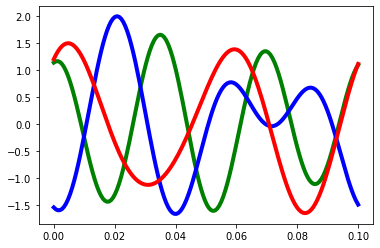

In [427]:
t = np.linspace(0, 0.1, 150)
W = bp_weights_dft(5, len(t), 2, 4).T
fig = plt.figure()
plt.plot(t, W[0], 'g', lw=4)
plt.plot(t, W[1], 'b', lw=4)
plt.plot(t, W[2], 'r', lw=4)

### Frequency XOR data

In [66]:
from data_fns import XOR_data

In [67]:
nPoints, fs, sig_dur = 5000, 1500, 0.1
k1, k2 = 5, 8
a = 0.99
freq = [int(k1/ sig_dur), int(k2  / sig_dur)]
X, y = XOR_data(nPoints, fs, k1, k2, sig_dur, a, seed=20)

In [1]:
# plot
snr = a ** 2 / (1 - a ** 2)
N = int(fs * sig_dur)
t = np.arange(N) / fs * 1000
nPoints_quarter = int(nPoints / 4)
fig = plt.figure(figsize=(10.6, 8))
# plt.suptitle('XOR data: SNR=%0.2f' % snr, fontsize=16)
ax = fig.add_subplot(211)
plt.plot(t, X[0], 'k-', lw=3, alpha=0.6, label='$\omega_1=$%d Hz' % freq[0])
plt.plot(t, X[1250], 'k', lw=5, label=r'$\omega_2=$%d Hz' % freq[1])
plt.legend(loc='lower right', fontsize=35)
# plt.xlabel('time (ms)', fontsize=20)
# plt.ylabel('Amplitude', fontsize=20)
plt.ylim([-2, 2])
ax.set_yticks([-1.5, 0, 1.5])
ax.tick_params(direction='out', length=10, width=2, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)


ax = fig.add_subplot(212)
plt.plot(t, X[2501], 'r', lw=5, label=r'mixed $%d$ & $%d$ Hz' % (freq[0], freq[1]))
plt.plot(t, X[-1], 'r-', lw=2, alpha=0.6, label='white noise')
plt.legend(loc='lower right', fontsize=35)
# plt.xlabel('time (ms)', fontsize=20)
# plt.ylabel('Amplitude', fontsize=20)
plt.ylim([-2, 2])
ax.set_yticks([-1.5, 0, 1.5])
ax.tick_params(direction='out', length=10, width=2, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)
plt.tight_layout()
# plt.subplots_adjust(top=0.85)
# plt.savefig('figures/deepmath/freq_XOR_data.png')

NameError: name 'a' is not defined

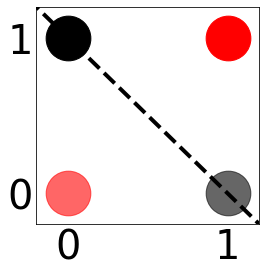

In [69]:
# XOR schematic
s = 2000
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.scatter([0], [0], c='r', alpha=0.6, s=s)
plt.scatter([0], [1], c='k', alpha=1, s=s)
plt.scatter([1], [0], c='k', alpha=0.6, s=s)
plt.scatter([1], [1], c='r', alpha=1, s=s)
plt.plot([-1, 2], [2, -1], 'k--', lw=4)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.xticks([0, 1], fontsize=30)
plt.yticks([0, 1], fontsize=30)
ax.tick_params(direction='out', length=0, width=0, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)
# plt.savefig('figures/deepmath/binary_XOR.png')

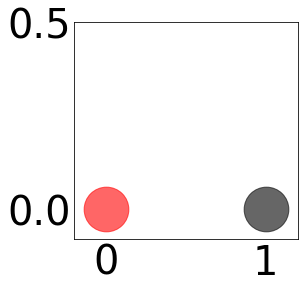

In [70]:
## freq detection schematic
s = 2000
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.scatter([0], [0], c='r', alpha=0.6, s=s)
plt.scatter([1], [0], c='k', alpha=0.6, s=s)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.08, 0.5])
ax.tick_params(direction='out', length=0, width=0, colors='k',
           grid_color='k', grid_alpha=0.5, labelsize=40)
plt.savefig('figures/deepmath/freq_detect_schematic.png')

### Frequency detection

In [71]:
with open('figures/deepmath/freq_detect.pickle', 'rb') as handle:
    freq_detect = pickle.load(handle)
    
mean_err_bp_freq, std_err_bp_freq = np.mean(freq_detect['bandpass_dft'], axis=1), np.std(freq_detect['bandpass_dft'], axis=1)
mean_err_wn_freq, std_err_wn_freq = np.mean(freq_detect['white noise'], axis=1), np.std(freq_detect['white noise'], axis=1)

n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
print(n_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 19, 22, 25, 29, 33, 39, 44, 51, 59, 68, 79, 91, 104, 120, 138, 159, 184, 212, 244, 281, 323, 372, 429, 494, 568, 655, 754, 868, 1000]


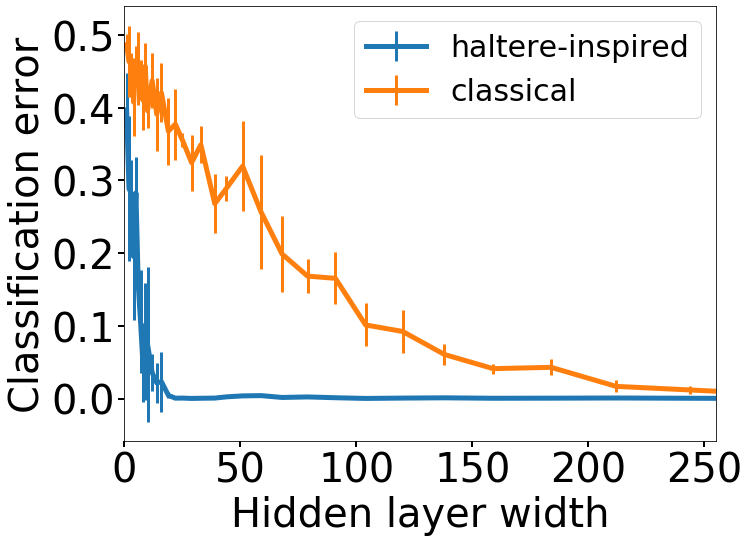

In [72]:
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, mean_err_bp_freq, yerr=std_err_bp_freq, fmt='-', label='haltere-inspired',  
            markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, mean_err_wn_freq, yerr=std_err_wn_freq, fmt='-', label='classical',  
            markersize=4, lw=5, elinewidth=3)
ax.set_xlim([0, 255])
plt.yticks(np.arange(0, 0.6, 0.1))
# plt.ylim([0, 0.55])
# ax.set_yscale('log')
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 255, 50))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig('figures/deepmath/freq_detection.png')

### Frequency XOR

In [73]:
with open('figures/deepmath/freq_XOR.pickle', 'rb') as handle:
    freq_XOR = pickle.load(handle)
    
# compute mean
mean_err_bp_XOR, std_err_bp_XOR = np.mean(freq_XOR['bandpass_dft'], axis=1), np.std(freq_XOR['bandpass_dft'], axis=1)
mean_err_wn_XOR, std_err_wn_XOR = np.mean(freq_XOR['white noise'], axis=1), np.std(freq_XOR['white noise'], axis=1)

n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
print(n_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 19, 22, 25, 29, 33, 39, 44, 51, 59, 68, 79, 91, 104, 120, 138, 159, 184, 212, 244, 281, 323, 372, 429, 494, 568, 655, 754, 868, 1000]


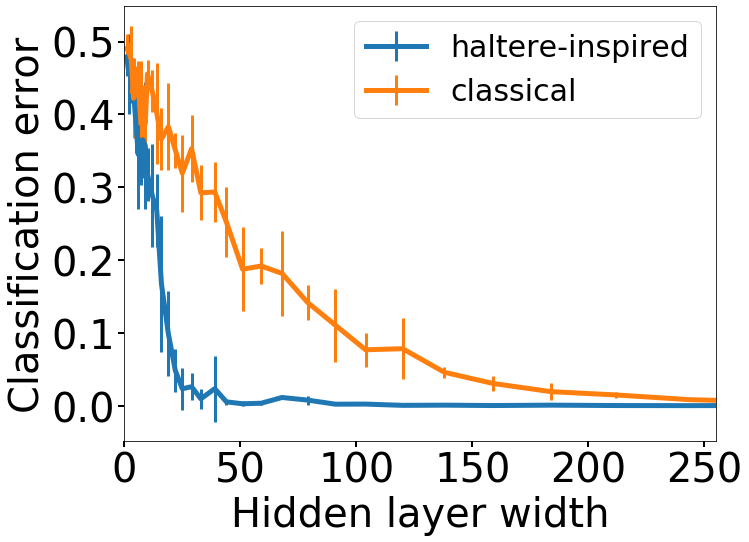

In [74]:
# plot
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, mean_err_bp_XOR, yerr=std_err_bp_XOR, fmt='-', label='haltere-inspired',  
            markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, mean_err_wn_XOR, yerr=std_err_wn_XOR, fmt='-', label='classical',  
            markersize=4, lw=5, elinewidth=3)
ax.set_xlim([0, 255])
plt.yticks(np.arange(0, 0.6, 0.1))
# ax.set_yscale('log')
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 255, 50))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)

# plt.savefig('figures/deepmath/freq_XOR_results.png')

### MNIST clf

In [2]:
with open('figures/deepmath/MNIST_clf.pickle', 'rb') as handle:
    MNIST_clf = pickle.load(handle)
    
# compute mean
mean_err_gabor_MNIST, std_err_gabor_MNIST = np.mean(MNIST_clf['gabor'], axis=1), np.std(MNIST_clf['gabor'], axis=1)
mean_err_wn_MNIST, std_err_wn_MNIST = np.mean(MNIST_clf['white noise'], axis=1), np.std(MNIST_clf['white noise'], axis=1)

n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
print(n_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 19, 22, 25, 29, 33, 39, 44, 51, 59, 68, 79, 91, 104, 120, 138, 159, 184, 212, 244, 281, 323, 372, 429, 494, 568, 655, 754, 868, 1000]


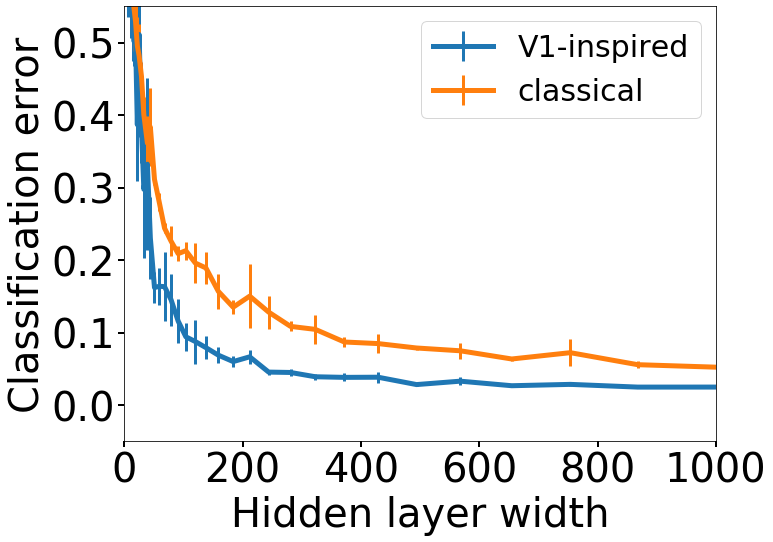

In [3]:
# plot
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, mean_err_gabor_MNIST, yerr=std_err_gabor_MNIST, fmt='-', label='V1-inspired',  
            markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, mean_err_wn_MNIST, yerr=std_err_wn_MNIST, fmt='-', label='classical',  
            markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 1020, 200))
plt.xlim([0, 1000])
plt.yticks(np.arange(0, 0.6, 0.1))
plt.ylim([-0.05, 0.55])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)

# plt.savefig('figures/deepmath/MNIST_results.png')

### MNIST with few shot learning

In [78]:
with open('figures/deepmath/MNIST_clf_5samp_class.pickle', 'rb') as handle:
    MNIST_few_shot = pickle.load(handle)

In [79]:
# compute mean
mean_err_gabor_MNIST_few_shot, std_err_gabor_MNIST_few_shot = np.mean(MNIST_few_shot['gabor'], 
                                                    axis=1), np.std(MNIST_few_shot['gabor'], axis=1)
mean_err_wn_MNIST_few_shot, std_err_wn_MNIST_few_shot = np.mean(MNIST_few_shot['white noise'], 
                                              axis=1), np.std(MNIST_few_shot['white noise'], axis=1)

n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
print(n_features)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 19, 22, 25, 29, 33, 39, 44, 51, 59, 68, 79, 91, 104, 120, 138, 159, 184, 212, 244, 281, 323, 372, 429, 494, 568, 655, 754, 868, 1000]


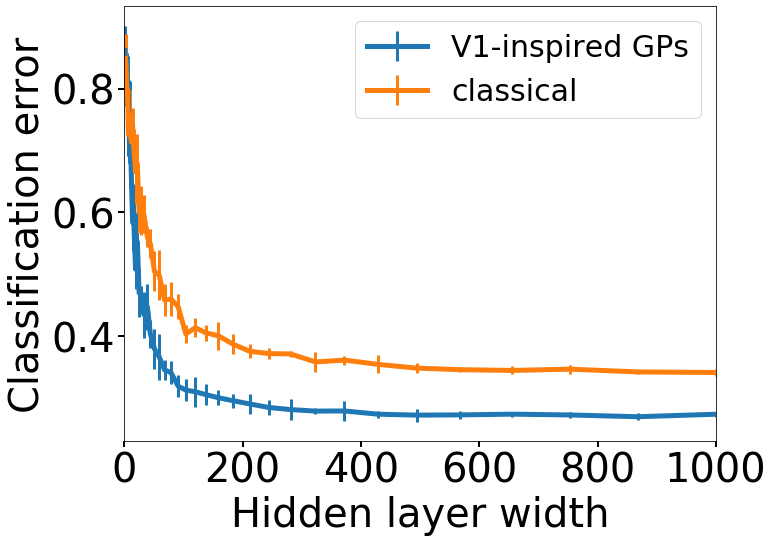

In [80]:
# plot
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
ax.errorbar(n_features, mean_err_gabor_MNIST_few_shot, yerr=std_err_gabor_MNIST_few_shot, 
            fmt='-', label='V1-inspired', markersize=4, lw=5, elinewidth=3)
ax.errorbar(n_features, mean_err_wn_MNIST_few_shot, yerr=std_err_wn_MNIST_few_shot, fmt='-', label='classical',  
            markersize=4, lw=5, elinewidth=3)
plt.xlabel('Hidden layer width', fontsize=40)
plt.ylabel('Classification error', fontsize=40)
plt.xticks(np.arange(0, 1020, 200))
plt.xlim([0, 1000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.legend(loc = 'upper right', fontsize=30)

In [81]:
# compare performance
# freq task
n_features = sorted(set(np.logspace(0, 3, 50).astype('int')))
n_features = np.array(n_features)
print(n_features[mean_err_bp_freq * 100 <= 1.1][0])
print(n_features[mean_err_wn_freq * 100 <= 1.2][0])

# freq XOR
print(n_features[mean_err_bp_XOR * 100 <= 1.1][0])
print(n_features[mean_err_wn_XOR * 100 <= 1.1][0])

# MNIST
print(n_features[mean_err_gabor_MNIST * 100 <= 5.1][0])
print(n_features[mean_err_wn_MNIST * 100 <= 5.5][0])

19
244
33
244
244
1000


In [85]:
list(zip(n_features, mean_err_wn_MNIST * 100))

[(1, 84.336),
 (2, 81.59600000000002),
 (3, 79.566),
 (4, 74.60600000000001),
 (5, 73.004),
 (6, 72.62600000000002),
 (7, 68.08800000000001),
 (8, 66.33000000000001),
 (9, 64.254),
 (10, 60.046),
 (12, 61.397999999999996),
 (14, 56.57600000000001),
 (16, 55.01799999999999),
 (19, 52.86199999999999),
 (22, 49.564),
 (25, 48.184000000000005),
 (29, 45.352),
 (33, 40.05200000000001),
 (39, 36.138),
 (44, 38.354),
 (51, 31.136000000000003),
 (59, 28.004000000000005),
 (68, 24.406),
 (79, 22.611999999999995),
 (91, 20.89),
 (104, 21.298000000000002),
 (120, 19.594),
 (138, 18.914),
 (159, 15.678),
 (184, 13.502),
 (212, 15.028000000000002),
 (244, 12.826),
 (281, 10.854),
 (323, 10.442),
 (372, 8.7),
 (429, 8.481999999999998),
 (494, 7.8740000000000006),
 (568, 7.487999999999999),
 (655, 6.355999999999998),
 (754, 7.227999999999998),
 (868, 5.569999999999999),
 (1000, 5.228)]

In [474]:
list(zip(n_features, mean_err_gabor_MNIST_few_shot))

[(1, 0.86182),
 (2, 0.8237400000000001),
 (3, 0.8197599999999999),
 (4, 0.80494),
 (5, 0.79522),
 (6, 0.8130200000000001),
 (7, 0.78268),
 (8, 0.74074),
 (9, 0.6917000000000001),
 (10, 0.72548),
 (12, 0.6548),
 (14, 0.58402),
 (16, 0.58342),
 (19, 0.508),
 (22, 0.5525),
 (25, 0.47012),
 (29, 0.46609999999999996),
 (33, 0.43486),
 (39, 0.44786000000000004),
 (44, 0.40378),
 (51, 0.37946),
 (59, 0.36651999999999996),
 (68, 0.34574000000000005),
 (79, 0.34116),
 (91, 0.31936),
 (104, 0.313),
 (120, 0.31029999999999996),
 (138, 0.30569999999999997),
 (159, 0.30067999999999995),
 (184, 0.29585999999999996),
 (212, 0.29063999999999995),
 (244, 0.28498),
 (281, 0.28152),
 (323, 0.2791),
 (372, 0.27931999999999996),
 (429, 0.27409999999999995),
 (494, 0.27257999999999993),
 (568, 0.27296),
 (655, 0.27416),
 (754, 0.27286),
 (868, 0.27),
 (1000, 0.27402)]

In [476]:
list(zip(n_features, mean_err_wn_MNIST_few_shot))

[(1, 0.84354),
 (2, 0.84956),
 (3, 0.837),
 (4, 0.7947799999999999),
 (5, 0.7996800000000001),
 (6, 0.7714399999999999),
 (7, 0.72554),
 (8, 0.75146),
 (9, 0.75714),
 (10, 0.7289),
 (12, 0.7136000000000001),
 (14, 0.73966),
 (16, 0.70304),
 (19, 0.66562),
 (22, 0.67866),
 (25, 0.5997199999999999),
 (29, 0.60254),
 (33, 0.59762),
 (39, 0.5597),
 (44, 0.5492600000000001),
 (51, 0.5046200000000001),
 (59, 0.49868000000000007),
 (68, 0.45832000000000006),
 (79, 0.46012),
 (91, 0.44767999999999997),
 (104, 0.40363999999999994),
 (120, 0.4138),
 (138, 0.40549999999999997),
 (159, 0.4008),
 (184, 0.38706),
 (212, 0.37572),
 (244, 0.37206),
 (281, 0.37138),
 (323, 0.35852000000000006),
 (372, 0.36150000000000004),
 (429, 0.35456),
 (494, 0.34852),
 (568, 0.34597999999999995),
 (655, 0.34476),
 (754, 0.34682),
 (868, 0.34236),
 (1000, 0.3414)]

In [63]:
# lowest error for all plots
n_features = np.array(n_features)
ii = n_features == 244
print('Freq detection:' , mean_err_bp_freq[ii] * 100, mean_err_wn_freq[ii] * 100)
print('XOR:', mean_err_bp_XOR[ii] * 100, mean_err_wn_XOR[ii] * 100)
print('MNIST:', mean_err_gabor_MNIST[-1] * 100, mean_err_wn_MNIST[-1] * 100)

Freq detection: [0.03636364] [1.17575758]
XOR: [0.04] [0.85333333]
MNIST: 2.482000000000002 5.228


0
1
2
3
4
5
6
7
8
9
